In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# from sklearn.tree import export_graphviz
from sklearn import decomposition

In [2]:
df = pd.read_csv(r"C:\Users\nirmi\Downloads\AML\Wine.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df = df.drop("Customer_Segment",axis= 1)

In [5]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


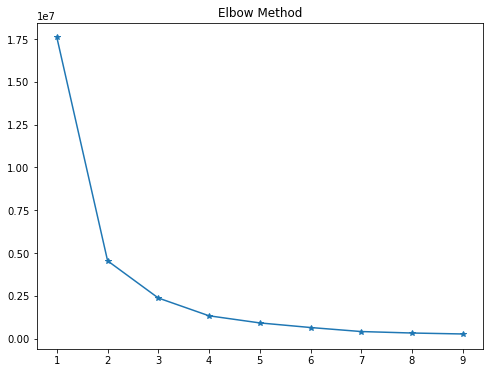

In [7]:
ints=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(df)
    ints.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,10),ints, marker="*")
plt.title("Elbow Method")
plt.show()

In [8]:
kmeans=KMeans(n_clusters=2, init="k-means++")
X_centered = df - df.mean(axis=0)
cl=kmeans.fit_predict(X_centered)

In [9]:
print(kmeans.labels_)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
kmeans.cluster_centers_

array([[ 6.65927477e-01, -4.65621042e-01,  6.13013279e-02,
        -2.04221655e+00,  6.54933606e+00,  5.21069459e-01,
         8.67275792e-01, -6.89448417e-02,  3.06010215e-01,
         4.62273754e-01,  1.09205107e-01,  4.55041879e-01,
         4.04834014e+02],
       [-2.97772449e-01,  2.08204531e-01, -2.74111629e-02,
         9.13186261e-01, -2.92856490e+00, -2.32998538e-01,
        -3.87806248e-01,  3.08289942e-02, -1.36833836e-01,
        -2.06707776e-01, -4.88315520e-02, -2.03474011e-01,
        -1.81023340e+02]])

In [12]:
df.groupby(cl).size() 

0     55
1    123
dtype: int64

In [15]:
print('Accuracy: ',silhouette_score(df, kmeans.labels_));

Accuracy:  0.6568536504294317
